# Analyzing Promotion Effectiveness with ANOVA

# Business Problem
As a data professional supporting our marketing team, I was tasked with uncovering whether different promotion types—like TV ads, social media campaigns, radio spots, and influencer partnerships—actually led to meaningful differences in sales. I explored the historical data, using visuals and descriptive stats to pinpoint a key promotional factor. From there, I built and validated a regression model, then ran a one-way ANOVA and post hoc test to dig deeper into group differences. The insights I shared helped the team confidently fine-tune their strategy and invest in the channels that truly drive results.

# Project Goals
To identify whether different types of marketing promotions (TV, social media, radio, influencer) lead to statistically significant differences in sales, and to provide the team actionable insights that guide marketing strategy and budget allocation.

# Skills and Tools Applied
- Exploratory Data Analysis (Python: pandas, seaborn, matplotlib)
- Regression Modeling (Python: statsmodels, scikit-learn)
- Diagnostic Checking (Python: sm.qqplot(), scipy.stats, seaborn)
- Hypothesis Testing and Statistical Inference (Python: statsmodels, scipy.stats)
- Post Hoc Analysis (e.g., Tukey’s HSD) (Python: statsmodels.stats.multicomp.pairwise_tukeyhsd())
- Insight Communication / Data Storytelling (Jupyter Notebook with Markdown cells)

In [1]:
# Import libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# load the dataset 
file = r"C:\Users\DEPROMISE501\Downloads\marketing_sales_data.csv"

data = pd.read_csv(file)

# Display the first ten rows
data.head(5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


__The features in the data are:__

- TV promotion budget (in Low, Medium, and High categories)
- Social media promotion budget (in millions of dollars)
- Radio promotion budget (in millions of dollars)
- Sales (in millions of dollars)
- Influencer size (in Mega, Macro, Nano, and Micro categories)

__DATA EXPLORATION__

Descriptive Statistics of Sales by TV Promotion Type

In [3]:
data.groupby('TV')['Sales'].describe().sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
TV,,,,,,,,
Low,197.0,91.646843,32.444833,31.199409,62.500502,91.699773,120.117391,147.028897
Medium,197.0,199.023461,32.814657,142.416906,166.631361,204.376413,226.068098,251.241492
High,176.0,300.529591,30.665876,248.802379,273.103265,298.240051,327.961999,358.420739


First, I will use a boxplot to determine how Sales vary based on TV promotion budget category

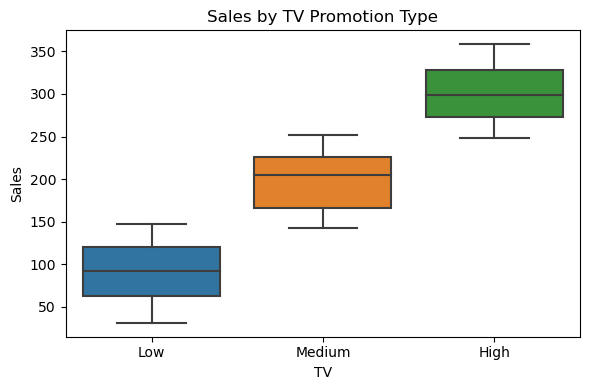

In [4]:
# Create a boxplot with TV and Sales.

plt.figure(figsize=(6, 4))

sns.boxplot(x = "TV", y = "Sales", data = data)

plt.title('Sales by TV Promotion Type')

plt.tight_layout() 

plt.show()

Is there variation in Sales based off the TV promotion budget? Yes. There is considerable variation in Sales across the TV groups. High TV promotion is strongly associated with better sales performance, the significance of these differences can be tested with a one-way ANOVA.

Now, I will use a boxplot to determine how Sales vary based on the Influencer size category

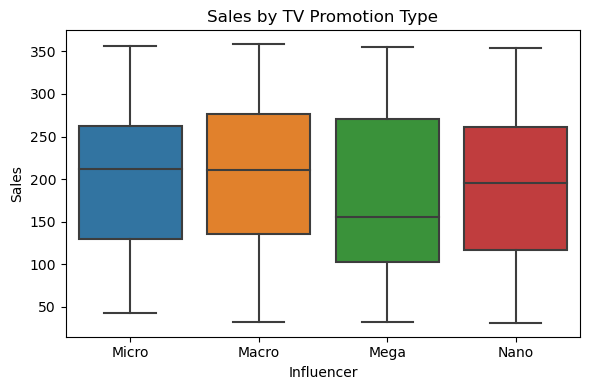

In [5]:
# Create a boxplot with Influencer and Sales

plt.figure(figsize=(6, 4))
sns.boxplot(x = "Influencer", y = "Sales", data = data)

plt.title('Sales by TV Promotion Type')

plt.tight_layout() 

plt.show()

There is some variation in Sales across the Influencer groups, but it may not be significant. However, the "Mega" influencers appear to have a lower median sales compared to "Micro" and "Macro."

In [6]:
data.groupby('Influencer')['Sales'].describe().sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Influencer,,,,,,,,
Mega,147.0,180.385096,97.884745,32.237030,102.113849,155.041237,271.125265,355.368871
Nano,148.0,190.777766,90.946770,31.199409,116.180606,195.742649,261.399683,354.292515
Micro,145.0,198.655080,83.242707,42.719955,130.161047,212.412506,261.966812,356.533252
Macro,131.0,205.660047,88.051879,32.566825,135.501076,211.036850,276.707499,358.420739


 __CHECK AND REMOVE MISSING DATA__

In [7]:
# check for missing data 

data.isnull().any().sum()

# Drop rows that contain missing data and update the DataFrame

data = data.dropna(axis=0)

# Confirm the data contain no missing values

data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


 __MODEL BUILDING__

Fit a linear regression model that predicts Sales using one of the independent categorical variables
in data.

In [8]:
# Define the OLS formula

ols_formula = 'Sales ~ C(TV)'

# Create an OLS model

OLS = ols(formula = ols_formula, data = data)

# Fit the model

model = OLS.fit()

# Save the results summary

model_results = model.summary()

# Display the model results

model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          8.81e-256
Time:                        14:06:23   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Notes:__ TV was selected because the preceding analysis showed a strong relationship between the TV promotion budget and the average Sales. Influencer was not selected because it did not show a strong relationship to Sales in the analysis.

The regression model result shows that TV promotion level has a strong and statistically significant impact on sales. High-intensity TV campaigns perform best, while Medium and Low levels lead to significantly fewer sales — by about 101 and 209 units, respectively. The model explains nearly 87% of the variation in sales, which means our insights are robust and actionable.

__CHECK MODEL ASSUMPTIONS__

Now, I will check the four linear regression assumptions are upheld for your model.

__Question 1:__ Is the linearity assumption met?

Because your model does not have any continuous independent variables, the linearity assumption is not required.

__Question 2:__ The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

__Question 3:__ Next, I'll verify that the normality assumption is upheld for the model.

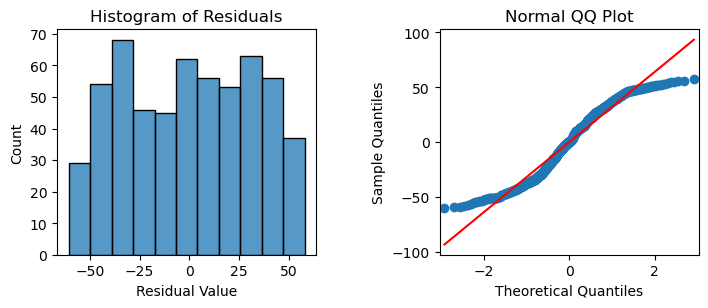

In [9]:
# Calculate the residuals

residuals = model.resid

# Create a 1x2 plot figure
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals

sm.qqplot(residuals, line='s', ax = axes[1])

# Set the title of the QQ plot
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance
plt.tight_layout(pad=4.0)

# Show the plot
plt.show()

There is reasonable concern that the normality assumption is not met when TV is used as the independent variable predicting Sales. The normal q-q forms an 'S' that slightly deviates off the red diagonal line, which is not desired behavior.

However, the overall pattern is not severely off-track. With a strong model fit (R² = 87.4%) and a good-sized dataset, this small violation likely won't harm the reliability of the results.

__Question 4:__ Now, verifying the constant variance (homoscedasticity) assumption is met for this model.

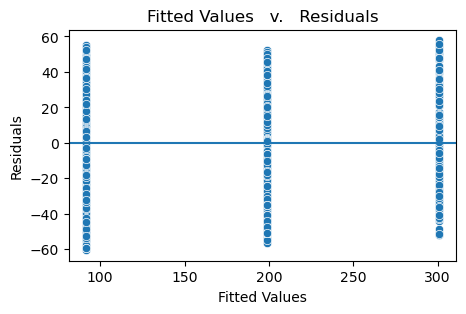

In [10]:
# Create a scatter plot with the fitted values from the model and the residuals

plt.figure(figsize=(5, 3)) # Reduced width to 5 inches and height to 3 inches

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values   v.   Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0
fig.axhline(y=0)

# Show the plot
plt.show()

The residuals are not randomly scattered. Instead, they form vertical clusters above and below zero at each of the fitted value levels (around 95, 200, and 300). This pattern directly corresponds to the distinct predicted sales values. Validating that the variance of the errors is constant across the different levels of our predictors (homoscedasticity). Thus, the assumption is met.

__RESULTS AND EVALUATION__

OLS Regression Results

In [11]:
# Display the model results summary

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          8.81e-256
Time:                        14:06:23   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Using TV as the independent variable results in a linear regression model with  𝑅2=0.874
  In other words, the model explains  87.4% of the variation in Sales. This makes the model an effective predictor of Sales.
  
  
- What is the intepretation of the coefficient estimates? Are the coefficients statistically significant? The default TV category for the model is High, because there are coefficients for the other two TV categories, Medium and Low. According to the model, Sales with a Medium or Low TV category are lower on average than Sales with a High TV category. For example, the model predicts that a Low TV promotion would be 208.813 (in millions of dollars) lower in Sales on average than a High TV promotion.


- The p-value for all coefficients is  0.000, meaning all coefficients are statistically significant at  𝑝=0.05. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a  95% chance the interval  [−215.353, −202.274] contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤, which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.


- Simply put, these results strongly indicate that the level of TV promotion has a highly significant impact on sales. High TV campaigns lead to the highest sales. Medium campaigns lead to significantly lower sales than High, and Low campaigns lead to even more significantly lower sales than High. The consistent P>|t| values of 0.000 across all coefficients emphasize that these observed differences are very unlikely due to random chance.

__Could the model be improved? How?__

YES — even though the model performs well (with R² = 0.874, which is strong), there can be improvement.

Why it could be improved:

Residual Patterns: If residuals show non-random patterns or non-normality (like skewness), it suggests the model might likely be missing something.

Limited Predictors: The model only includes TV promotions — but sales are likely influenced by other channels (social media, Radio etc.)

How to improve it:

Including other promotions (e.g., social media, Radio, and influencer types) to build a multivariable model.

Using cross-validation techniques like k-fold to check if the model generalizes well.

__PERFORM A ONE-WAY ANOVA TEST__


With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in Sales among groups.

In [12]:
# Create an one-way ANOVA table for the fit model
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


__Question: What are the null and alternative hypotheses for the ANOVA test?__

The null hypothesis is that there is no difference in Sales based on the TV promotion budget.

The alternative hypothesis is that there is a difference in Sales based on the TV promotion budget.

__ANOVA TEST RESULT SUMMARY__

1. C(TV) — This is the independent variable (TV promotion type).

- sum_sq (4.05e+06): Amount of variation in sales explained by TV types.

- df = 2: Two degrees of freedom (for 3 levels: Low, Medium, High).

- F = 1971: A very large F-statistic__strong evidence of differences between TV types.

- PR(>F) = 8.81e-256: The p-value is extremely small__the result is highly significant.

2. Residual — Variation not explained by TV.

- sum_sq = 5.82e+05: The leftover variation in sales.

- df = 566: Based on number of observations minus number of independent variable (TV promotion type).


Conclusively, this ANOVA table provides overwhelming statistical evidence that the TV promotion level has a highly significant impact on Sales. The low p-value (8.805550e-256) indicates that the observed differences in sales means across the TV promotion types are not due to random chance and are statistically significant.


The results of the one-way ANOVA test indicate that I can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in Sales among TV groups.

__PERFORM AN ANOVA POST HOC TEST__

A post hoc test was conducted to determine which TV groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.

In [14]:
# Perform the Tukey's HSD post hoc test

tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

# Display the results

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


__TUKEY HSD TEST RESULT SUMMARY?__

The first row, which compares the High and Low TV groups, indicates that I can reject the null hypothesis __ that there is no significant difference between the Sales of these two groups.

Clearly, I can also reject the null hypotheses for the two other pairwise comparisons that compare High to Medium and Low to Medium. 

__CONSIDERATIONS__

Stakeholders summary report considering the statistical significance of key relationships and differences in distribution.

High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.

Specifically, following are estimates for the difference between the mean sales resulting from different pairs of TV promotions, as determined by the Tukey's HSD test:

1. Estimated difference between the mean sales resulting from High and Low TV promotions: \$208.81 million (with 95% confidence that the exact value for this difference is between 200.99 and 216.64 million dollars).

2. Estimated difference between the mean sales resulting from High and Medium TV promotions: \$101.51 million (with 95% confidence that the exact value for this difference is between 93.69 and 109.32 million dollars).

3. difference between the mean sales resulting from Medium and Low TV promotions: \$107.31 million (with 95% confidence that the exact value for this difference is between 99.71 and 114.91 million dollars).

The linear regression model estimating Sales from TV had an R-squared of $0.871, making it a fairly accurate estimator. The model showed a statistically significant relationship between the TV promotion budget and Sales.

The results of the one-way ANOVA test indicate that the null hypothesis that there is no difference in Sales based on the TV promotion budget can be rejected. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was found.

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test.